In [79]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
import graphviz
import matplotlib.pyplot as plt
import numpy as np



In [80]:
# 讀取訓練資料和標籤
data = pd.read_csv('training_data_with_labels_5000.csv')

X = data['Input']
y = data['Label']

In [81]:
# 使用One-Hot Encoding將姓名特徵進行轉換
# column_transformer = ColumnTransformer(
#     transformers=[('Input', OneHotEncoder(), ['Input'])],
#     remainder='passthrough'
# )
# X = column_transformer.fit_transform(X)

In [82]:
# 使用CountVectorizer來處理特徵
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [83]:
# 使用PCA進行降維，將特徵矩陣轉換成2維數據
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

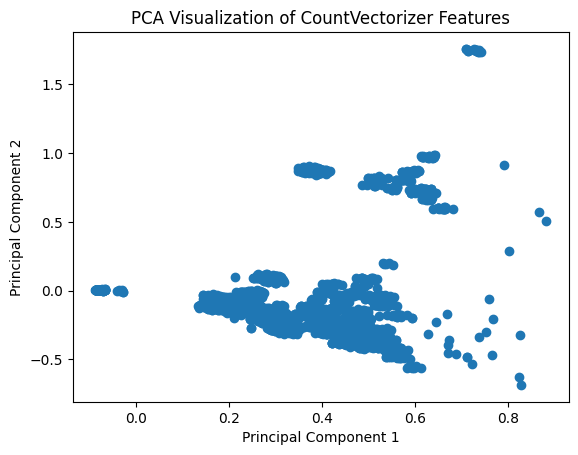

In [88]:
# 繪製散點圖展示轉換後的2維數據
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of CountVectorizer Features')
plt.show()

In [84]:
# 將資料拆分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# 建立梯度提升機模型
gbm_model = GradientBoostingClassifier()


In [86]:
# 將特徵矩陣轉換為NumPy數組
X_train_array = X_train.toarray()

In [87]:
# 訓練模型
gbm_model.fit(X_train_array, y_train)

KeyboardInterrupt: 

In [ ]:
# 預測測試集
y_pred = gbm_model.predict(X_test)

In [ ]:
# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
print("準確率:", accuracy)

準確率: 0.543


In [ ]:
report = classification_report(y_test, y_pred)
print("分類報告:")
print(report)

分類報告:
              precision    recall  f1-score   support

           0       1.00      0.09      0.17      1051
           1       0.42      1.00      0.59       977
           2       1.00      0.57      0.73       972

    accuracy                           0.54      3000
   macro avg       0.80      0.55      0.49      3000
weighted avg       0.81      0.54      0.49      3000



In [ ]:
# 繪製第一棵樹（也可以繪製其他樹，更改estimator_index參數即可）
estimator_index = 0
dot_data = export_graphviz(gbm_model.estimators_[estimator_index][2], out_file=None, 
    feature_names=None, class_names=gbm_model.classes_,
    filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('tree3')  # 將樹繪製為PDF檔案，名稱為'tree.pdf'

In [ ]:
# 定義不同數量的訓練樣本，例如：50%，60%，70%，...，100%
train_sizes = np.linspace(0.1, 1.0, 10)
print(sklearn.__version__)
# 計算學習曲線數據
train_sizes_abs, train_scores, test_scores = learning_curve(gbm_model, X_train_array, y_train, train_sizes=train_sizes, cv=5)



1.3.0


KeyboardInterrupt: 

In [ ]:
# 計算訓練集和驗證集的平均準確率
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# 繪製學習曲線圖表
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_abs, train_mean, label='Training Accuracy')
plt.plot(train_sizes_abs, test_mean, label='Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()